# IMPORTING LIBRARIES

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
import pickle
warnings.filterwarnings("ignore")

In [39]:
dframe=pd.read_csv(r"framingham.csv")

In [40]:
df=dframe.copy()
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# DATA PREPROCESSING

In [41]:
#IT SEEMS EDUCATION HAS NO REALTION WITH HEART DISEASE SO LETS DROP IT 
df.drop(["education"],axis=1,inplace=True)

In [42]:
df.rename(columns={'TenYearCHD':'target'},inplace=True)

In [43]:
df


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [44]:
print(df.shape)

(4240, 15)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  target           4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [46]:
#good to see all attributes are numerical

In [47]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

as data set is too big as compared to the null values so we can extract these records

In [48]:
#filling all null values in glucose attribute with the mean value
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df.dropna(inplace=True)

In [49]:
df.shape

(4090, 15)

In [50]:
#lets classify the attributes  into catagorical and random list
catag=[i for i in df.columns if len(df[i].unique())<4]
random=[i for i in df.columns if len(df[i].unique())>=4]

In [51]:
catag.remove("target")

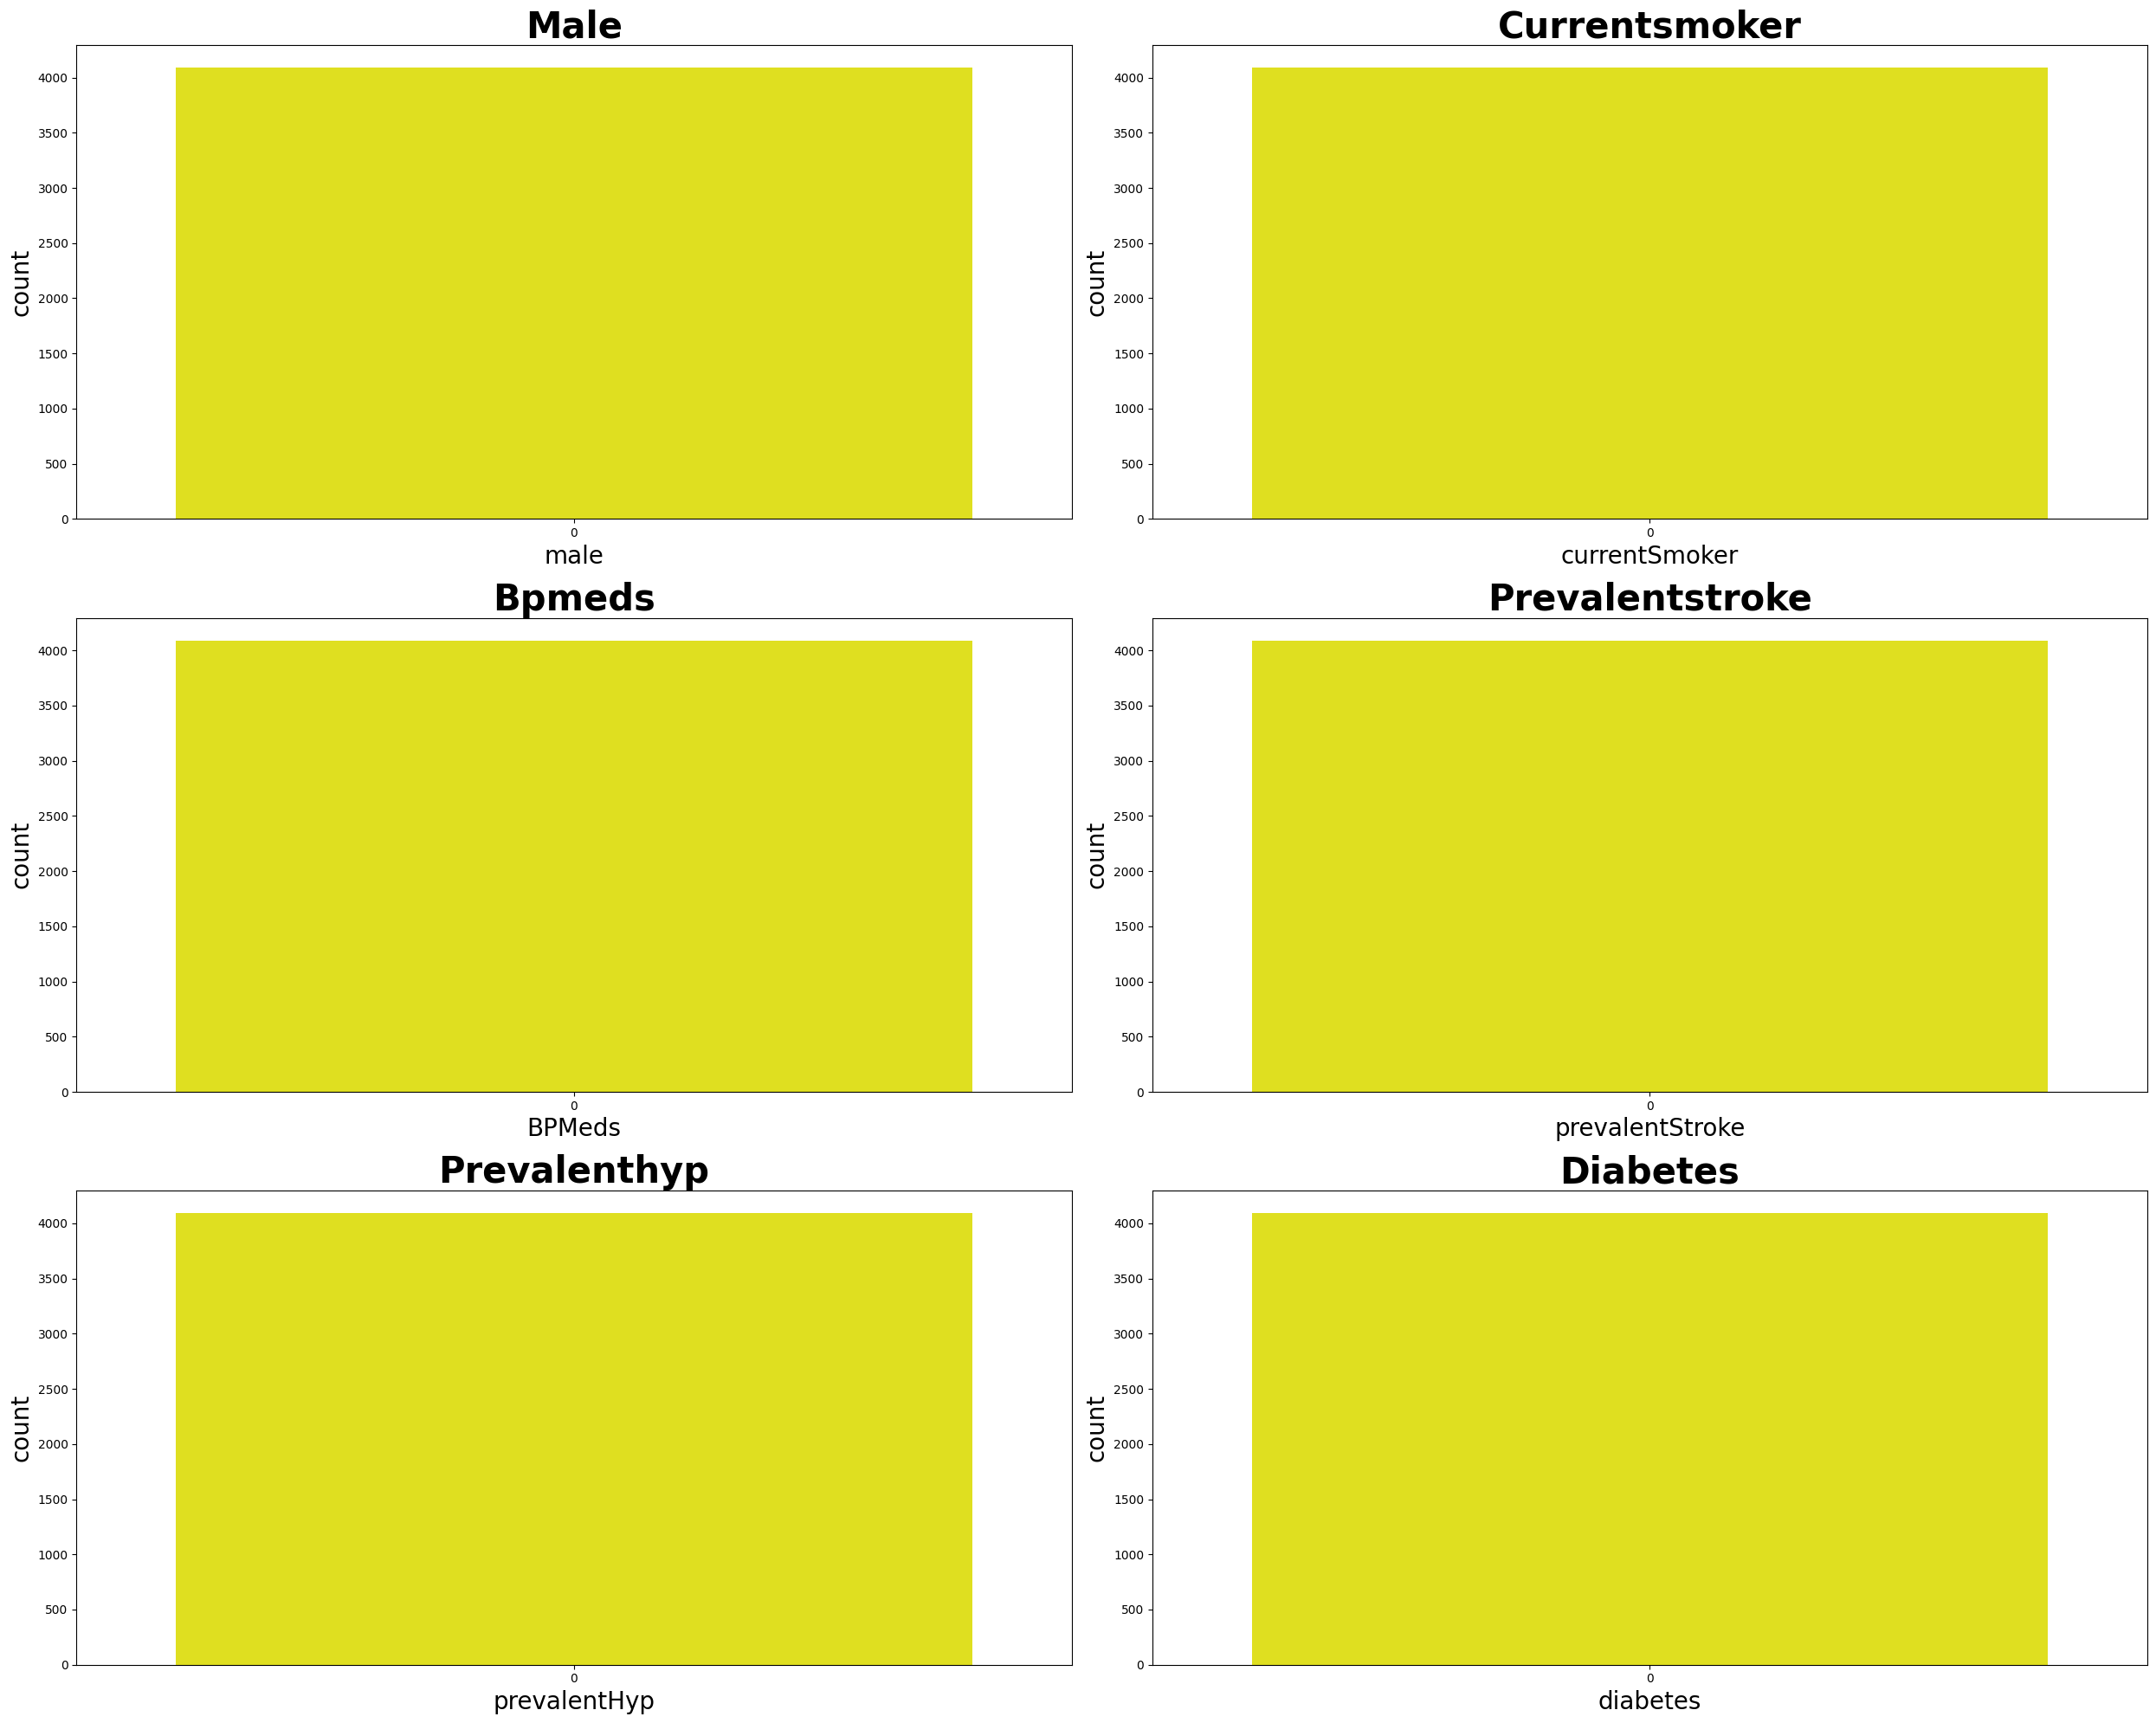

In [52]:
plt.figure(figsize=(25,20))
for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    
    plt.xlabel(column,fontsize=20)
    plt.ylabel("COUNT",fontsize=20)
    sns.countplot(df[column],color='yellow')
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()

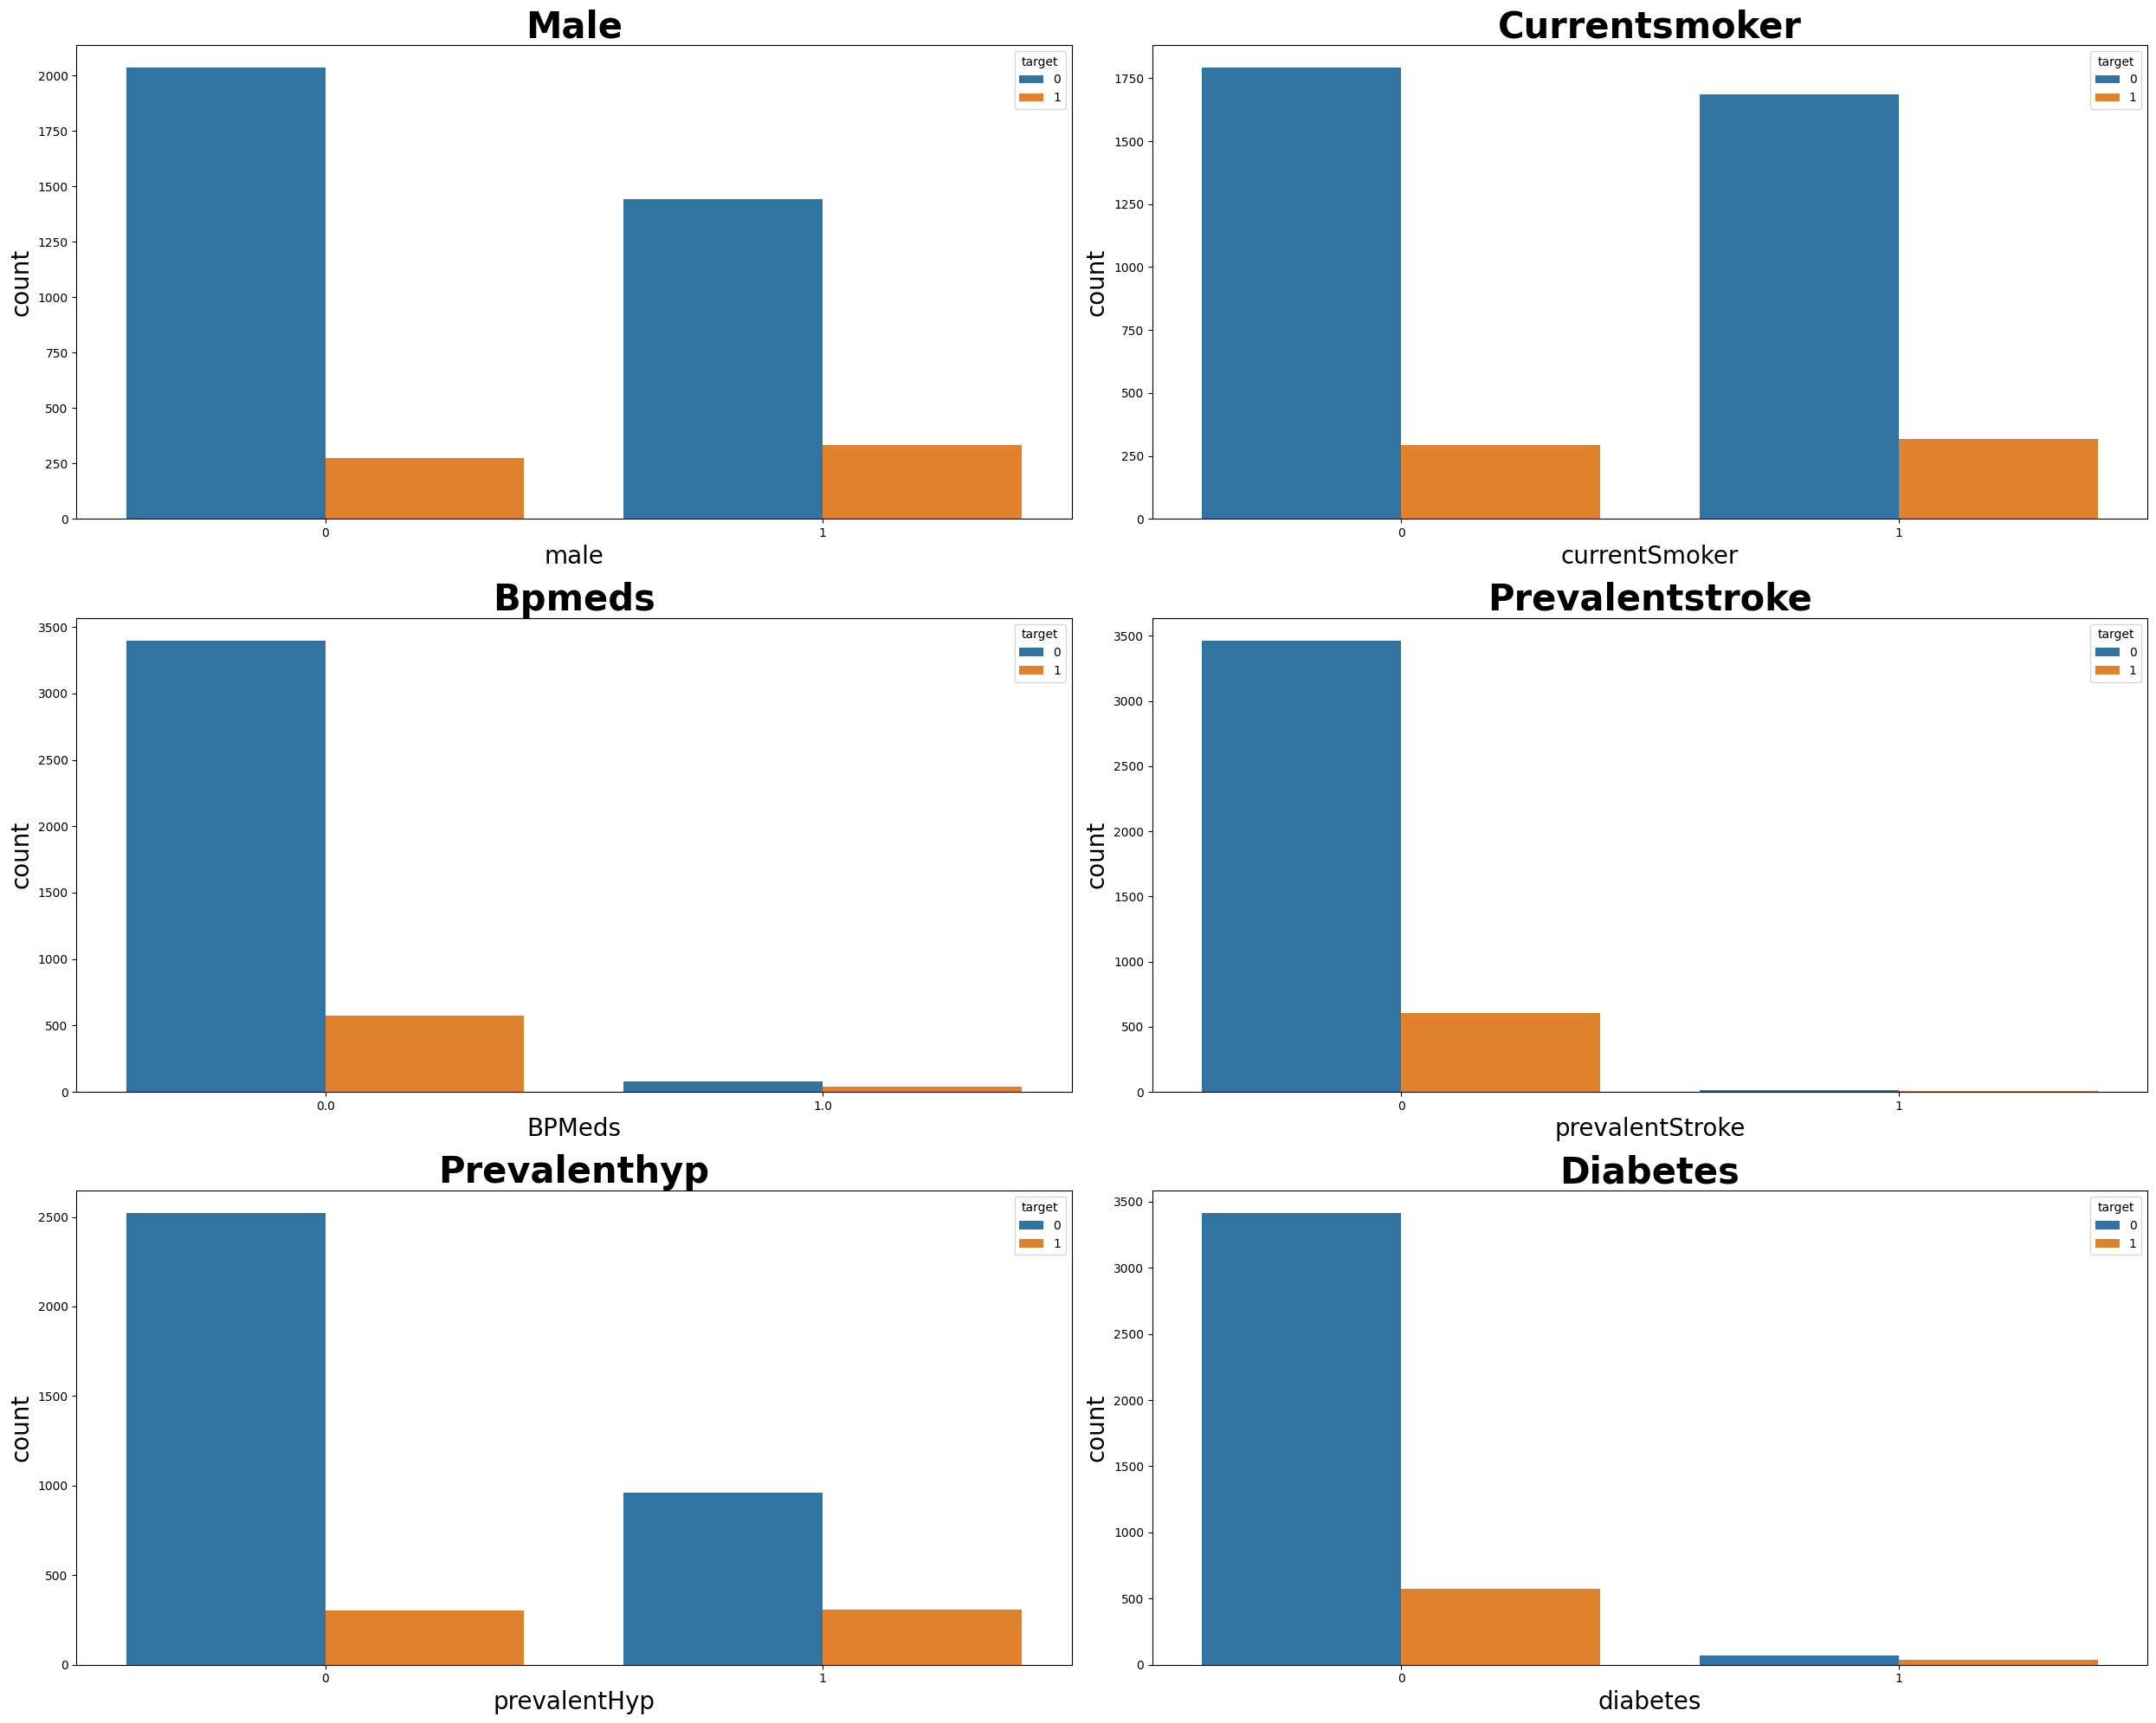

In [54]:
plt.figure(figsize=(25,20))
for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("count",fontsize=20)
    sns.countplot(x=df[column],hue=df["target"])
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()

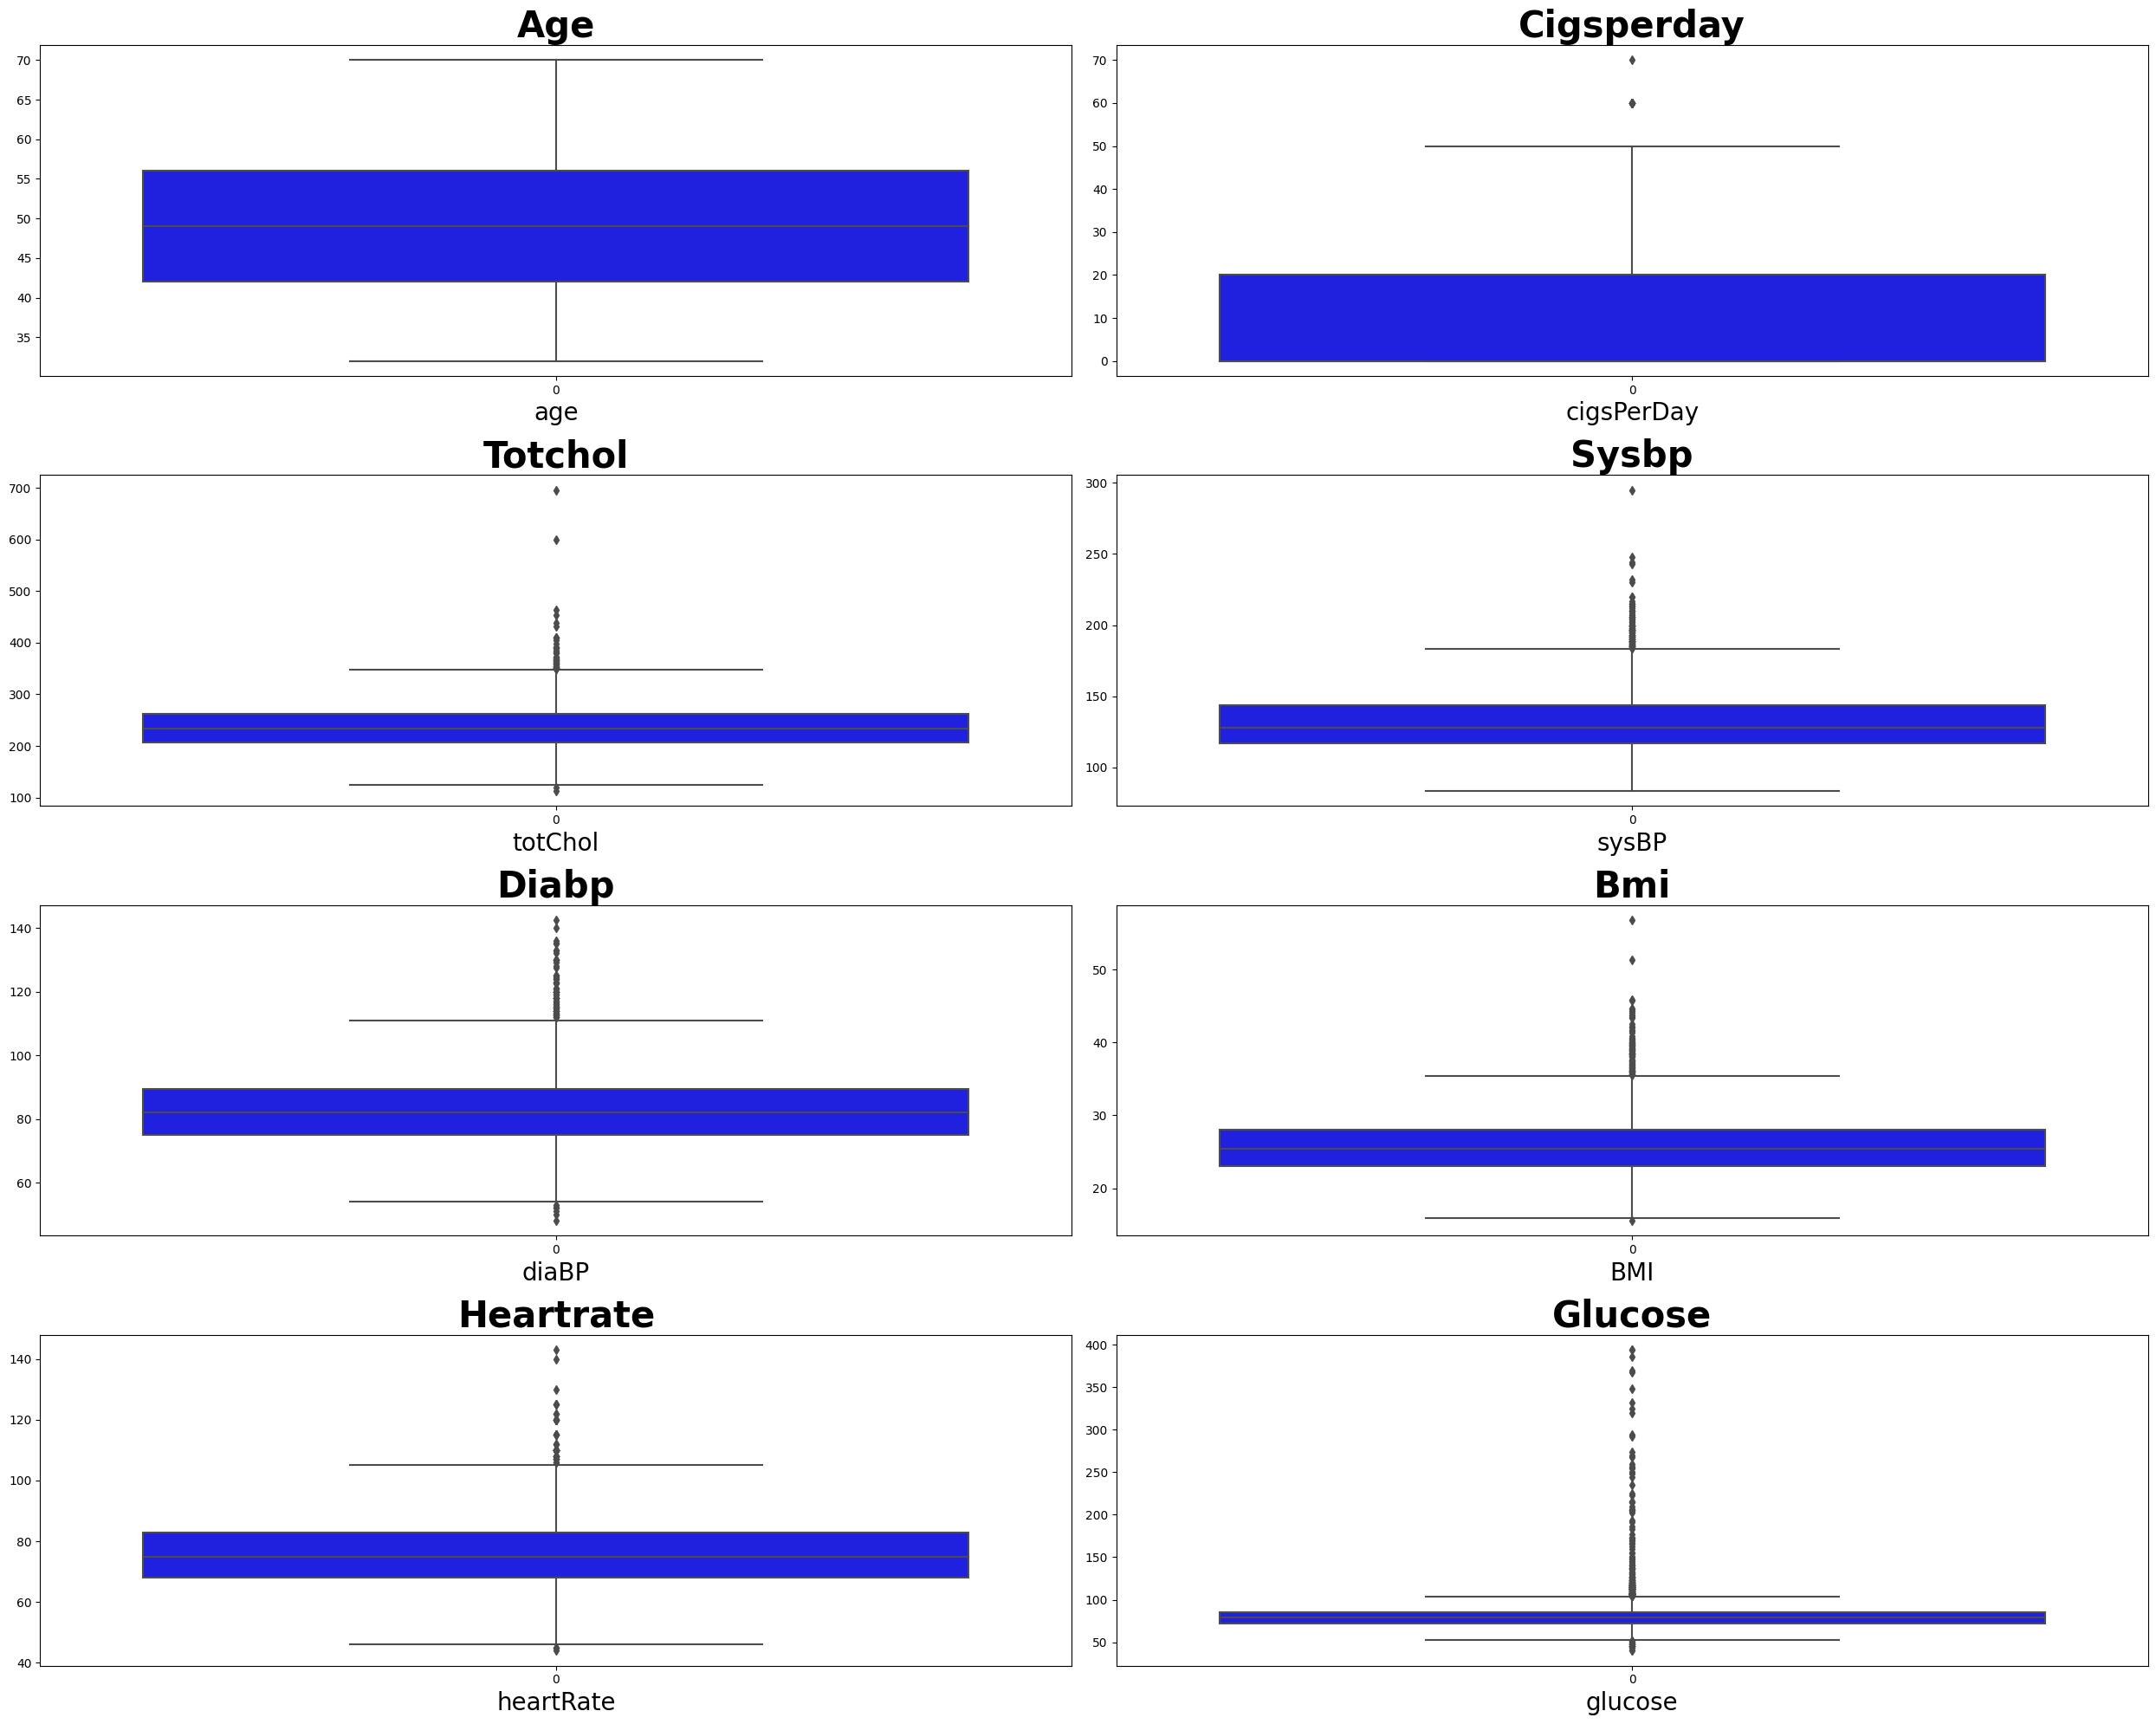

In [55]:
plt.figure(figsize=(25,20))
for n,column in enumerate(random):
    plot=plt.subplot(4,2,n+1)
    plt.xlabel(column,fontsize=20)
    sns.boxplot(df[column],color="blue")
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()
plt.show()

In [56]:
df["target"].value_counts()
#it looks unbalanced, so we have to make it balanced before model fitting



target
0    3479
1     611
Name: count, dtype: int64

In [62]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [67]:

import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_res, y_res = oversample.fit_resample(x, y)

In [68]:
y_res.value_counts()

target
0    3479
1    3479
Name: count, dtype: int64

# TRAIN TEST SPLIT

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.22,random_state=40)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5427, 14), (1531, 14), (5427,), (1531,))

In [70]:
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [71]:
# lets standardise the xtrain and xtest
standard=StandardScaler()

In [83]:
xtrain=standard.fit_transform(xtrain)
xtest=standard.transform(xtest)

with open (standardscaler.pkl, 'wb') as file:
    pickle.dump(standard, file)

NameError: name 'standardscaler' is not defined

# MODEL CREATION

logistic regression

In [74]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr2=lr.predict(xtrain)
ypred_lr=lr.predict(xtest)
lr_model=accuracy_score(ypred_lr,ytest,normalize=True, sample_weight=None)
lr_model2=accuracy_score(ypred_lr2,ytrain,normalize=True, sample_weight=None)

print(f"accuracy for test set :{lr_model}\naccuracy for train set :{lr_model2}")
score1 = cross_val_score(lr, xtrain, ytrain, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score1.mean(),2)}")

accuracy for test set :0.6923579359895493
accuracy for train set :0.6718260549106321

after cross validation the accuracy is 0.67


In [75]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       768
           1       0.69      0.70      0.69       763

    accuracy                           0.69      1531
   macro avg       0.69      0.69      0.69      1531
weighted avg       0.69      0.69      0.69      1531



decision tree

In [76]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
#test for test dataset
ypred_dtree=dtree.predict(xtest)
dtree_model=accuracy_score(ytest,ypred_dtree)
#test for train data
ypred_dtree2=dtree.predict(xtrain)
dtree_model2=accuracy_score(ytrain,ypred_dtree2)
print(f"accuracy for test set :{dtree_model}\naccuracy for train set :{dtree_model2}")
score2 = cross_val_score(dtree, xtrain, ytrain, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score2.mean(),2)}")

accuracy for test set :0.8641410842586544
accuracy for train set :1.0

after cross validation the accuracy is 0.91


In [77]:
print(classification_report(ytest,ypred_dtree))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       768
           1       0.84      0.90      0.87       763

    accuracy                           0.86      1531
   macro avg       0.87      0.86      0.86      1531
weighted avg       0.87      0.86      0.86      1531



Random forest classifier

In [78]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain.values.ravel())
ypred_rf=rf.predict(xtest)
rf_model=accuracy_score(ypred_rf,ytest)
ypred_rf2=rf.predict(xtrain)
rf_model2=accuracy_score(ypred_rf2,ytrain)
print(f"accuracy for test set :{rf_model:.2f}\naccuracy for train set :{rf_model2:.2f}")

score3 = cross_val_score(rf, xtrain, ytrain, cv = 30)
print(f"\nafter cross validation the accuracy is {round(score3.mean(),2)}")

accuracy for test set :0.98
accuracy for train set :1.00

after cross validation the accuracy is 0.97


In [79]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       768
           1       0.96      1.00      0.98       763

    accuracy                           0.98      1531
   macro avg       0.98      0.98      0.98      1531
weighted avg       0.98      0.98      0.98      1531



K-nearest neighbor (KNN)

In [80]:
#finding best k value 
l=[]
for k in range(1,40):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xtrain,ytrain)
    l.append(classifier.score(xtest,ytest))
k=np.argmax(l)+1
print(f"k ={k}")

k =1


In [ ]:
#KNN model implementation
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,ytrain)

ypred_knn=knn.predict(xtest)
knn_model=accuracy_score(ypred_knn,ytest)

ypred_train=knn.predict(xtrain)
knn_model2=accuracy_score(ypred_train,ytrain)

print(f"accuracy for test set :{knn_model:.2f}\naccuracy for train set :{knn_model2:.2f}")
#cross validating
score4 = cross_val_score(knn, xtrain, ytrain, cv = 10)
print(f"\nafter cross validation the accuracy is {round(score4.mean(),2)}")


accuracy for test set :0.93
accuracy for train set :1.00

after cross validation the accuracy is 0.92


In [ ]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       768
           1       0.88      0.99      0.93       763

    accuracy                           0.93      1531
   macro avg       0.93      0.93      0.93      1531
weighted avg       0.93      0.93      0.93      1531



ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(14, input_shape=(14,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=80)

Epoch 1/80
170/170 [==============================] - 1s 898us/step - loss: 0.6596 - accuracy: 0.6132
Epoch 2/80
170/170 [==============================] - 0s 858us/step - loss: 0.6141 - accuracy: 0.6685
Epoch 3/80
170/170 [==============================] - 0s 859us/step - loss: 0.6031 - accuracy: 0.6775
Epoch 4/80
170/170 [==============================] - 0s 860us/step - loss: 0.5979 - accuracy: 0.6786
Epoch 5/80
170/170 [==============================] - 0s 874us/step - loss: 0.5943 - accuracy: 0.6829
Epoch 6/80
170/170 [==============================] - 0s 848us/step - loss: 0.5912 - accuracy: 0.6880
Epoch 7/80
170/170 [==============================] - 0s 832us/step - loss: 0.5882 - accuracy: 0.6906
Epoch 8/80
170/170 [==============================] - 0s 841us/step - loss: 0.5862 - accuracy: 0.6921
Epoch 9/80
170/170 [==============================] - 0s 841us/step - loss: 0.5836 - accuracy: 0.6934
Epoch 10/80
170/170 [==============================] - 0s 869us/step - loss: 0.581

170/170 [==============================] - 0s 962us/step - loss: 0.4818 - accuracy: 0.7737


In [ ]:
model.evaluate(xtest,ytest)

48/48 [==============================] - 0s 734us/step - loss: 0.5413 - accuracy: 0.7453


[0.5413201451301575, 0.7452645301818848]

In [ ]:
yp = model.predict(xtest)
#as sigmoid function only provide the probabilities ,we have to convert it into the response i.e 1 or 0
ypred_ANN=[]
for i in yp:
    if i>=0.5:
        ypred_ANN.append(1)
    else:
        ypred_ANN.append(0)
p=accuracy_score(ypred_ANN,ytest)
print(f"accuracy for test set :{p:.2f}")


48/48 [==============================] - 0s 650us/step
accuracy for test set :0.75


              precision    recall  f1-score   support

           0       0.76      0.73      0.74       768
           1       0.74      0.76      0.75       763

    accuracy                           0.75      1531
   macro avg       0.75      0.75      0.75      1531
weighted avg       0.75      0.75      0.75      1531



Text(95.72222222222221, 0.5, 'predicted')

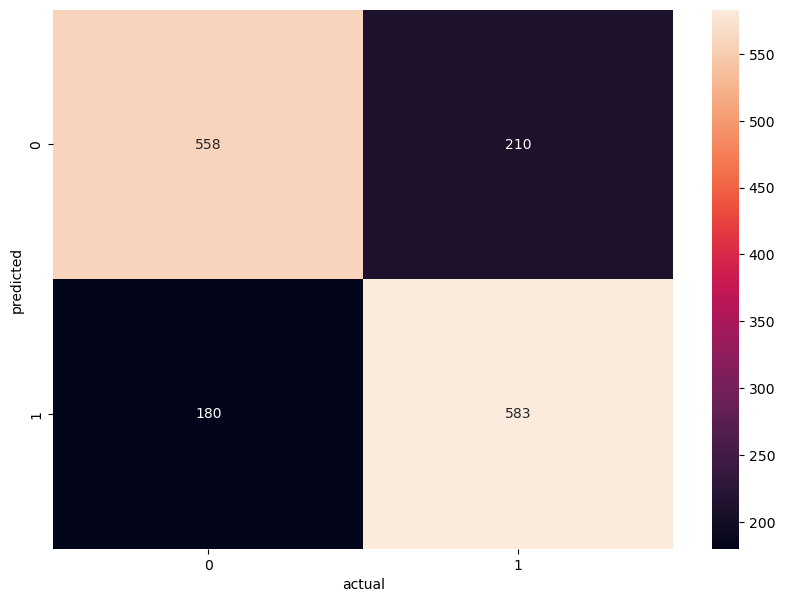

In [ ]:
print(classification_report(ytest,ypred_ANN))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_ANN)

plt.figure(figsize = (10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('predicted')

In [ ]:
pickle.dump()